Import the libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

Read the data

In [52]:
df = pd.read_csv('Valhalla23.csv')
df.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


In [53]:
X = df["Celsius"]
y = df["Valks"]

Split the data into train and test sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the data

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(X_train).reshape(-1, 1))
X_test = scaler.transform(np.array(X_test).reshape(-1, 1))

Create the model

In [56]:
learning_rate = 0.01 # is sufficent to avoid some divergences in the model and start learning
initial_intercept = 0.5 # it dont assume bias between positive and negative values
initial_coef = 0.1 # small value

model = SGDRegressor(
    max_iter=1000, 
    n_iter_no_change=100,  # Min 100 iterations
    tol=1e-5,  # Tolerance for early stopping
    learning_rate='constant',
    eta0=learning_rate,
    random_state=42
)

model.intercept_ = initial_intercept
model.coef_ = initial_coef

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Train results

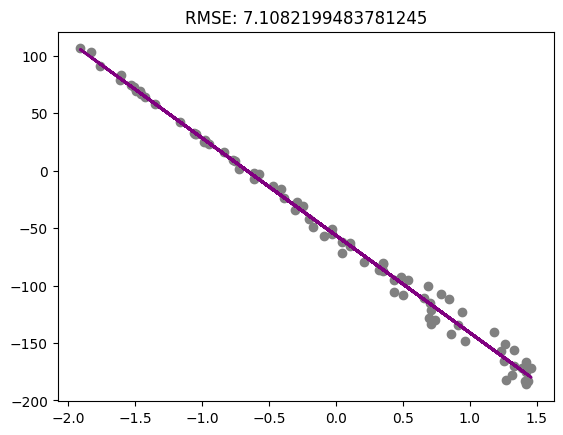

In [57]:
y_train_pred = model.predict(X_train)

rmse = np.sqrt(np.mean((y_train_pred - y_train) ** 2))

plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, y_train_pred, color='purple', linewidth=2)
plt.title(f'RMSE: {rmse}')
plt.show()

Test results

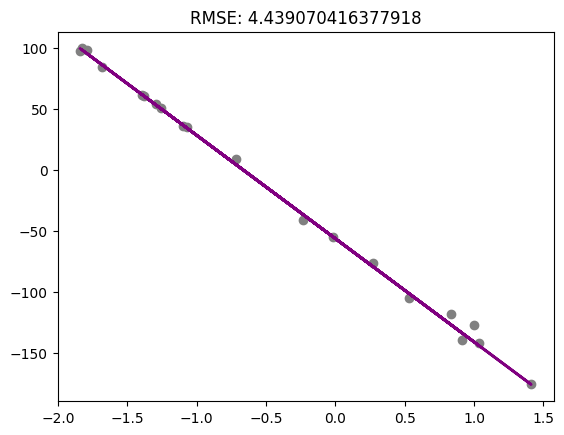

In [58]:
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='purple', linewidth=2)
plt.title(f'RMSE: {rmse}')
plt.show()